# F Linear regression BOSTON
_5 points_

Train a linear regression model on the BOSTON dataset to predict median values of houses. Test it on the
test set. Show the code how you did it! What dependent variables (columns) have the biggest influence?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [6]:
boston_table = pd.DataFrame(boston.data)
boston_table.columns = boston.feature_names
boston_table['MEDV'] = boston.target
boston_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Coefficients: [-1.30297070e-01  4.93739220e-02  1.52699792e-03  2.70755661e+00
 -1.60074619e+01  3.40741645e+00  1.18339212e-03 -1.49381089e+00
  3.64266500e-01 -1.31647943e-02 -9.53457936e-01  1.18685182e-02
 -5.94883957e-01]
MSE: 20.90284368037239


predict the fictional value of a house we want to sell:
Values: 
[  1.209306   0.         8.547      0.         0.5649     5.98605
  99.75       3.97656    4.2      322.35      22.05     376.7085
  19.2675  ]
Fictional price: [12.61561383]


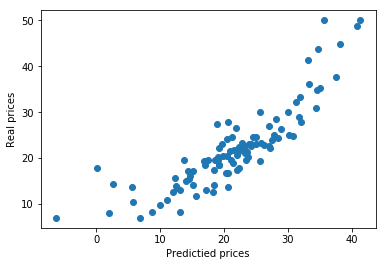

In [56]:
from sklearn.model_selection import train_test_split

X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
names = boston.feature_names

lin_reg_normal = LinearRegression()
lin_reg_normal.fit(X_train, Y_train)
normal_prediction = lin_reg_normal.predict(X_test)
print('Coefficients: {}'.format(lin_reg_normal.coef_))
plt.scatter(normal_prediction, Y_test)
plt.xlabel("Predictied prices")
plt.ylabel("Real prices")
print("MSE: {}".format(sklearn.metrics.mean_squared_error(Y_test, normal_prediction)))
print("\n")
print("predict the fictional value of a house we want to sell:")
fictional_house = X_train[0]*1.05
print("Values: \n{}".format(fictional_house))
fictonal_price = lin_reg_normal.predict(fictional_house.reshape(1, -1))
print("Fictional price: {}".format(fictonal_price))
# close feature values to our fictional house and its price
#print(Y_train[0])

Most significant value (k=1)... [18.35]
Most significant values (k=2)... [ 5.701 18.35 ]
... from this array : [  1.15172   0.        8.14      0.        0.538     5.701    95.
   3.7872    4.      307.       21.      358.77     18.35   ]

Scores of the SelectKBest model (k=1): 
[ 70.34793253  70.3443724  117.52227038  10.99838066  89.61208114
 308.36002731  67.3151842   27.50398153  67.23012884 101.44688866
 141.48772572  45.46361007 495.92670895]

Scores of the SelectKBest model (k=2): 
[ 70.34793253  70.3443724  117.52227038  10.99838066  89.61208114
 308.36002731  67.3151842   27.50398153  67.23012884 101.44688866
 141.48772572  45.46361007 495.92670895]

-----------

Coefficients CRIM: [-0.41247848]
MSE: 66.9151547546683
--------------------------------
Coefficients ZN: [0.15257264]
MSE: 75.10830109944823
--------------------------------
Coefficients INDUS: [-0.65510467]
MSE: 57.56276184296058
--------------------------------
Coefficients CHAS: [5.95524316]
MSE: 74.85865756754262


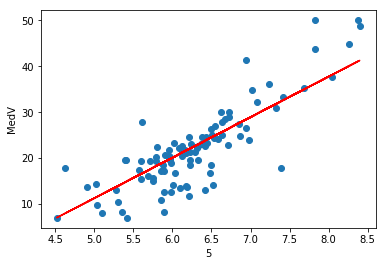

--------------------------------
Coefficients AGE: [-0.12402883]
MSE: 67.8462187008521
--------------------------------
Coefficients DIS: [1.14203634]
MSE: 74.25783765836503
--------------------------------
Coefficients RAD: [-0.40378907]
MSE: 66.36195010598259
--------------------------------
Coefficients TAX: [-0.0247456]
MSE: 55.27592896210288
--------------------------------
Coefficients PTRATIO: [-2.15901079]
MSE: 59.15265212517365
--------------------------------
Coefficients B: [0.03321748]
MSE: 66.56597738624318
--------------------------------
Coefficients LSTAT: [-0.97981166]
MSE: 38.82182901428658


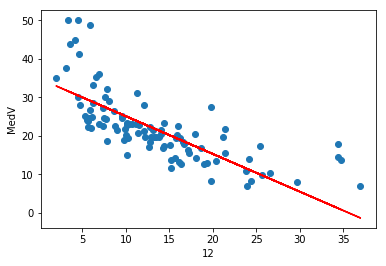

--------------------------------
MSE: 26.3928868226661
Red = original regression
Blue = regression with two most significant features


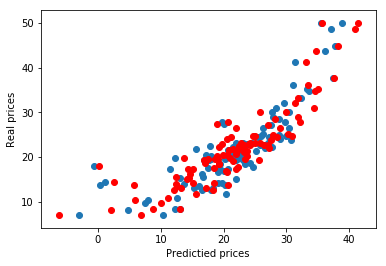

In [44]:
"""
What features are the most significant for the Boston dataset?
"""
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(f_regression, k=2)
arr = kbest.fit_transform(X_train, Y_train)
kbest_1 = SelectKBest(f_regression, k=1)
arr_1 = kbest_1.fit_transform(X_train, Y_train)
print("Most significant value (k=1)... {}".format(arr_1[0]))
print("Most significant values (k=2)... {}".format(arr[0]))
print("... from this array : {}".format(X_train[0]))


from sklearn.linear_model import LinearRegression

print()
print("Scores of the SelectKBest model (k=1): \n{}".format(kbest_1.scores_))
print()
print("Scores of the SelectKBest model (k=2): \n{}".format(kbest.scores_))
print()
arr = [5, 12]
print("-----------\n")
for i in range(13):        
    reg = LinearRegression()
    reg.fit(X_train[:, i].reshape(-1, 1), Y_train)
    pred = reg.predict(X_test[:, i].reshape(-1, 1))
    print('Coefficients {}: {}'.format(names[i], reg.coef_))
    #print("Intercept: {}".format(reg.intercept_))
    print("MSE: {}".format(sklearn.metrics.mean_squared_error(Y_test, pred)))
    if i in arr:
        plt.scatter(X_test[:, i], Y_test)
        plt.xlabel(i)
        plt.ylabel("MedV")
        plt.plot(X_test[:, i], pred, c="r")
        plt.show()
    print("--------------------------------")
print("================================")

#X_train[:, arr]
lin_reg_kbest = LinearRegression()
lin_reg_kbest.fit(X_train[:, arr], Y_train)
pred_kbest = lin_reg_kbest.predict(X_test[:, arr])
plt.scatter(pred_kbest, Y_test)
plt.scatter(normal_prediction, Y_test, c="r")
plt.xlabel("Predictied prices")
plt.ylabel("Real prices")
print("MSE: {}".format(sklearn.metrics.mean_squared_error(Y_test, pred_kbest)))
print("Red = original regression")
print("Blue = regression with two most significant features")

## Answer

In order to train and test the Boston Data Set, you first have to split the data into two. We decided to go for a ration of 1:4 (test:train) because the size of the test set was not given.

Our normal regression model is trained and tested in cell 3, printing out the regression coefficients, the MSE and plotting the graph with the predicted prices and the real ones.
With an MSE of about 20, the model is very accurate.<br><br>


The second part of the exercise was the question which dependent variables have the biggest influence. Therefore, we used "SelectKBest".
We also calculated the MSE for every feature, training the Linear Regression with only one feature and checked these values. According to that method, the "Room" feature is the most significant feature and the "Lstat" feature the second significant for the dataset.
However, SelectKBest calculates "Lstat" as the most significant feature and "Room" as the second significant feature. Because this method uses a more accurate and deeper statistical method regarding variance and how it can be explained, the "SelectKBest" method is our primary solution.<br>
In the graphics above one can see the price predictions based on one feature (in our case just "Rooms" and "Lstat") and their regression function. Both show, that they are significant because the feature alone gives a very accurate price prediction and the MSE are very low.<br>
The last graphic shows a price prediction (X_axis) and the real prices (Y_axis) with the two most significant features (Lstat and Rooms).<br>
We did not rank all features based on its significance, but it can be easily checked by the scores of the SelectKBest model (the highest score is the most significant feature, the least score is the least significant feature.

### Summing up:

Our normal regression on the Boston dataset (train:test split 4:1) scores with a MSE (mean squared error) of about 20.<br>
In the second exercise we used SelectKBest to determine the most significant features and did not focus on the MSE (statistical reasons). This gives us "Lstat" as the most significant feature; the higher Lstat is the lower the price is. The second significant feature is "Rooms", the more rooms the higher the price.<br>
Showing that those value represent the dataset quite well, we plotted both and reach a MSE of 26 (the original value was 20) and the graphs look very alike.

